In [2]:
import numpy as np

#Get data from data.csv (separated by semi colon) into numpy array from my github account
#skip first line and get only first and second column
#All values data type is float
values = np.genfromtxt('https://raw.githubusercontent.com/madusanka1990/master/main/data.csv', 
                       delimiter=";",skip_header=1,usecols=(0, 1)) 

625.394


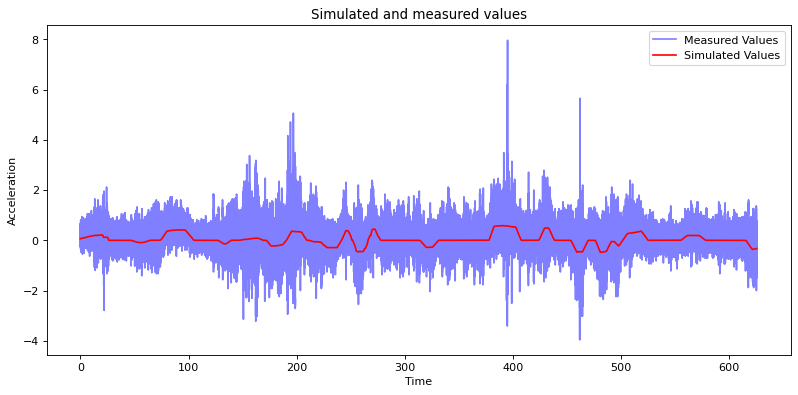

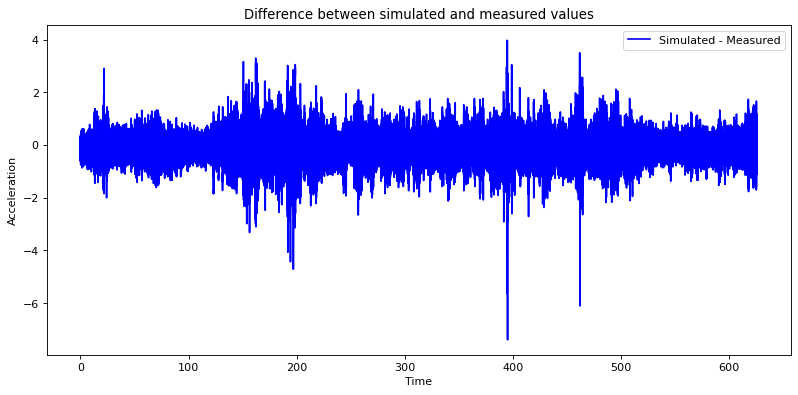

In [21]:
import matplotlib.pyplot as plt

measured_values = values[:,0] #Assign the measured acceleration values
simulated_values = values[:,1] #Assign the simulated values acceleration values
population_size = len(values)
sample_rate = 500 #500 samples per second
time_gap = 1/sample_rate #time gap between two data points
total_data_collection_time = (population_size - 1) * time_gap #total collection time
print(total_data_collection_time)
t = np.zeros(population_size)

t[0] = 0
for i in range(1, population_size):
    t[i] = t[i-1] + time_gap


plt.figure(figsize=(12, 12), dpi=80) #Set image size
plt.subplot(2,1,1)
plt.plot(t,measured_values,'blue',label='Measured Values',alpha=0.5) # Tranparency is 0.5
plt.plot(t,simulated_values,'red',label='Simulated Values')
plt.legend()
plt.title('Simulated and measured values')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

plt.figure(figsize=(12, 12), dpi=80) #Set image size
plt.subplot(2,1,2)
plt.plot(t,(simulated_values-measured_values),'blue',label='Simulated - Measured') #Difference
plt.legend()
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Difference between simulated and measured values')
plt.show()

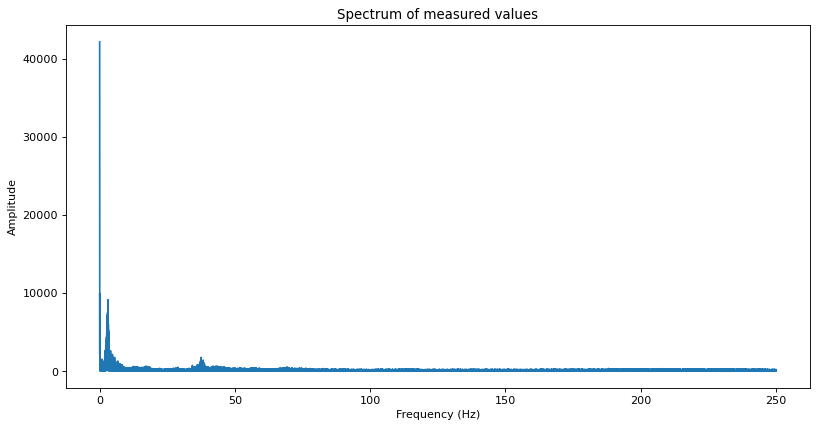

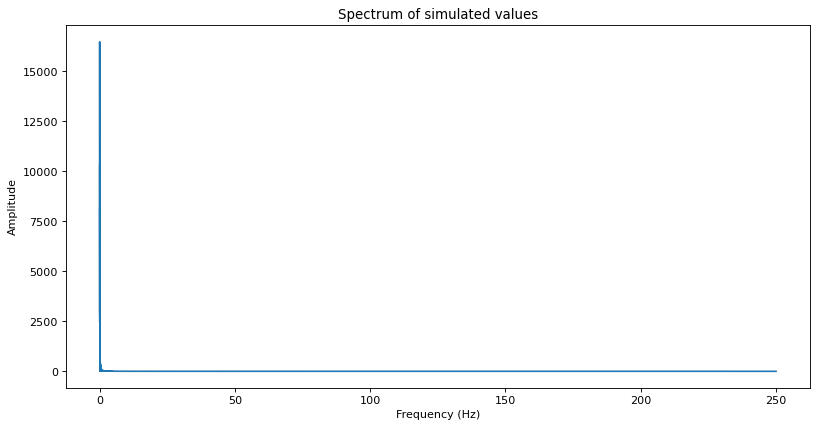

In [35]:
import scipy.fft
FFT_Results_measured = scipy.fft.fft(measured_values)
num_m = np.arange(len(FFT_Results_measured)) # Divide into equal points
T_m = len(FFT_Results_measured)/500   # sampling rate is 500Hz
freq_m = num_m/T_m
m = len(FFT_Results_measured)//2+1

plt.figure(figsize=(12, 6), dpi=80)#Set image size
# output is symmetric, so only take the first half (N/2)+1 data points
plt.plot(freq_m[:m], np.abs(FFT_Results_measured[:m]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of measured values')
plt.show()

FFT_Results_simulated = scipy.fft.fft(simulated_values)
num_s = np.arange(len(FFT_Results_simulated)) # Divide into equal points
T_s = len(FFT_Results_simulated)/500   # sampling rate is 500Hz
freq_s = num_s/T_s
s = len(FFT_Results_simulated)//2+1
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(freq_s[:s], np.abs(FFT_Results_simulated[:s]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of simulated values')
plt.show()


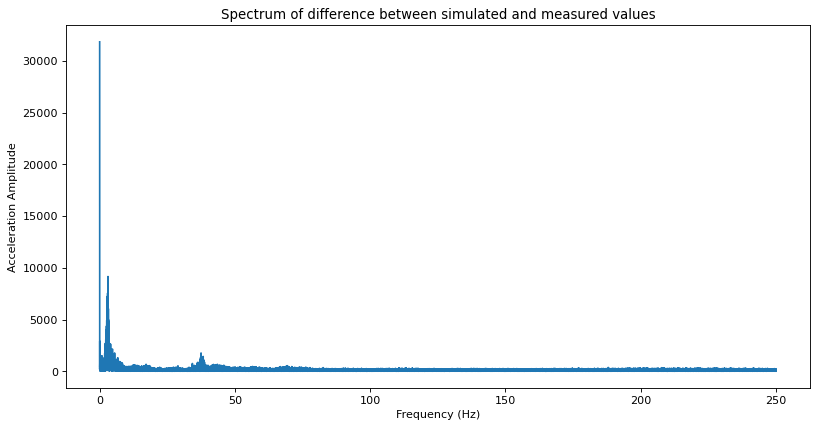

In [37]:
FFT_Results_diff = scipy.fft.fft(simulated_values-measured_values)
num = np.arange(len(FFT_Results_diff)) # Divide into equal points
T = len(FFT_Results_diff)/500  # sampling rate is 500Hz
freq = num/T
diff = len(FFT_Results_diff)//2+1

plt.figure(figsize=(12, 6), dpi=80)#Set image size
# output is symmetric, so only take the first half (N/2)+1 data points
plt.plot(freq[:diff], np.abs(FFT_Results_diff[:diff]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Acceleration Amplitude')
plt.title('Spectrum of difference between simulated and measured values')
plt.show()

In [11]:
corr = np.corrcoef(simulated_values, measured_values)
print(corr)

[[1.         0.44276358]
 [0.44276358 1.        ]]


Text(0.5, 1.0, 'Scatter plot between simulated and measured values')

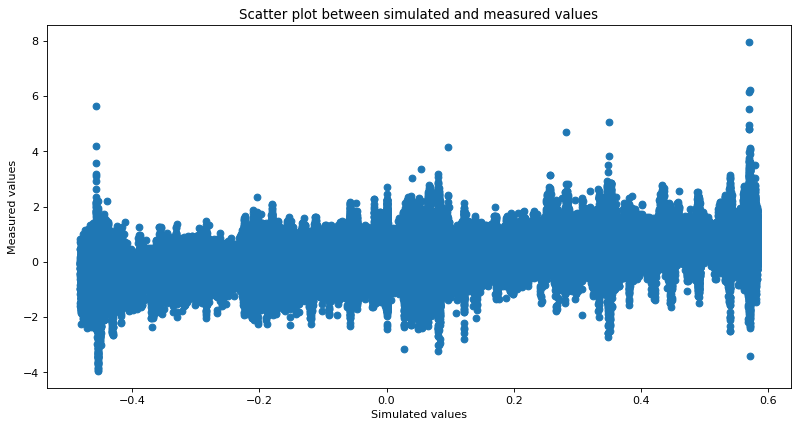

In [16]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(simulated_values, measured_values)
plt.xlabel('Simulated values')
plt.ylabel('Measured values')
plt.title('Scatter plot between simulated and measured values')

In [26]:
print(np.max(simulated_values))

0.58166


In [33]:
print('Measured')
print(np.sort(np.abs(FFT_Results_measured[:m]))[::-1])# Sorting the amplitude
print(np.sort(freq_m[:m]))# Sorting the frequency 
print('\nSimulated')
print(np.sort(np.abs(FFT_Results_simulated[:s]))[::-1])# Sorting the amplitude
print(np.sort(freq_s[:s]))# Sorting the frequency 

Measured
[4.21336400e+04 1.83276081e+04 1.62300958e+04 ... 4.29238145e-01
 4.17173014e-01 2.10868524e-01]
[0.00000000e+00 1.59898688e-03 3.19797376e-03 ... 2.49996802e+02
 2.49998401e+02 2.50000000e+02]

Simulated
[1.64705611e+04 1.38392164e+04 1.36227465e+04 ... 1.91216455e-01
 1.91124480e-01 1.91056322e-01]
[0.00000000e+00 1.59898688e-03 3.19797376e-03 ... 2.49996802e+02
 2.49998401e+02 2.50000000e+02]


In [39]:
print('Difference between simulated - Measured')
print(np.sort(np.abs(FFT_Results_diff[:diff]))[::-1])# Sorting the amplitude
print(np.sort(freq[:diff]))# Sorting the frequency 

Difference between simulated - Measured
[3.18474120e+04 9.15909701e+03 7.55863889e+03 ... 5.95972970e-01
 5.84185972e-01 5.26368836e-01]
[0.00000000e+00 1.59898688e-03 3.19797376e-03 ... 2.49996802e+02
 2.49998401e+02 2.50000000e+02]


In [41]:
sort_index = np.argsort(np.abs(FFT_Results_diff[:diff]))
print(sort_index)

[108342  75158  37428 ...   1847   1927      0]


In [44]:
print(np.abs(FFT_Results_diff[1927]))

9159.097007630151
